In [35]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

# New section

In [37]:
# read data
df = pd.read_csv('https://raw.githubusercontent.com/bhatiaarjun19/INFO6105/master/datasets/data.csv')
# data overview
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# shuffle the data because data in series
df = df.sample(frac=1)

df.iloc[:10]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
10,845636,M,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.033230,...,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452,NaN
59,858477,B,8.618,11.79,54.34,224.5,0.09752,0.05272,0.02061,0.007799,...,15.40,59.90,274.9,0.17330,0.12390,0.11680,0.04419,0.3220,0.09026,NaN
340,89813,B,14.420,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.042230,...,21.51,111.40,862.1,0.12940,0.33710,0.37550,0.14140,0.3053,0.08764,NaN
47,85715,M,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.073400,...,27.95,102.80,759.4,0.17860,0.41660,0.50060,0.20880,0.3900,0.11790,NaN
149,869931,B,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.013290,...,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014,NaN
489,913535,M,16.690,20.20,107.10,857.6,0.07497,0.07112,0.03649,0.023070,...,26.56,127.30,1084.0,0.10090,0.29200,0.24770,0.08737,0.4677,0.07623,NaN
540,921385,B,11.540,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.025940,...,19.68,78.78,457.8,0.13450,0.21180,0.17970,0.06918,0.2329,0.08134,NaN
153,87106,B,11.150,13.08,70.87,381.9,0.09754,0.05113,0.01982,0.017860,...,16.30,76.25,440.8,0.13410,0.08971,0.07116,0.05506,0.2859,0.06772,NaN
311,89382601,B,14.610,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.018770,...,21.75,103.70,840.8,0.10110,0.07087,0.04746,0.05813,0.2530,0.05695,NaN
485,913063,B,12.450,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.048460,...,21.03,97.82,580.6,0.11750,0.40610,0.48960,0.13420,0.3231,0.10340,NaN


In [ ]:

# drop the unnamed columns and id columns.
df = df.drop(columns=['Unnamed: 32', 'id'])

# no of rows and columns
df.shape

(569, 31)

In [ ]:
# Checking the data types
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
# Except 'diagnosis' all the columns are numeric
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# check for null values in dataset
df.isnull().values.any()

False

In [ ]:
# Count class labels
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

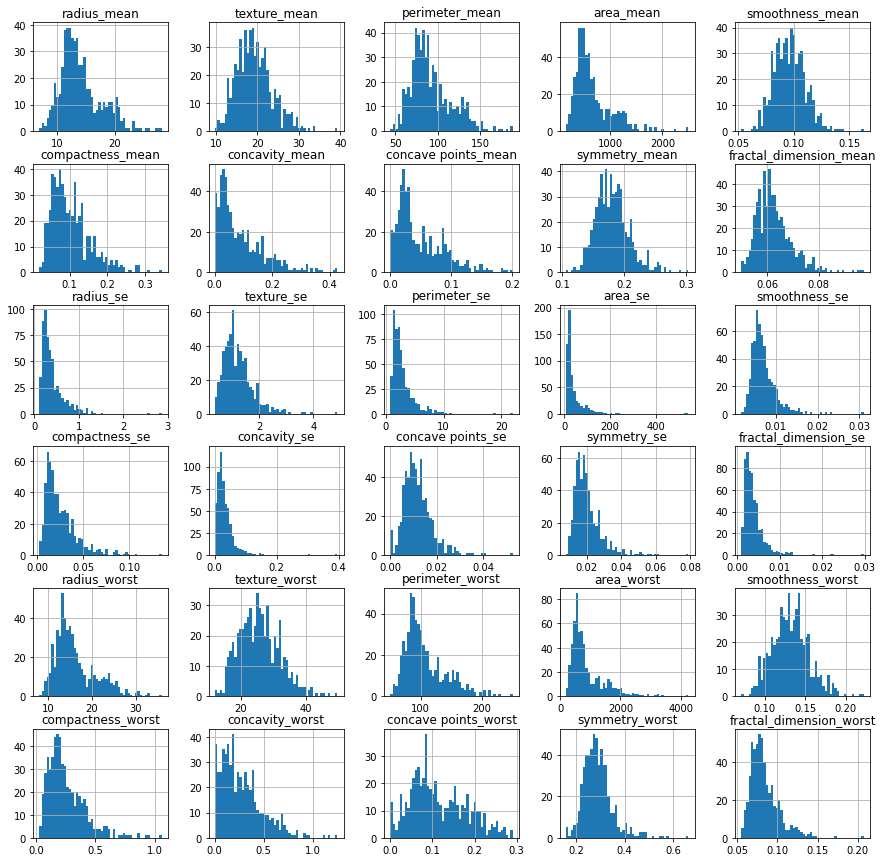

In [ ]:
# Data visualization to create histogram
df.hist(bins=50, figsize=(15, 15))
plt.show()

In [ ]:
# Scatter matrix to check correlation between two attributes
sns.pairplot(df, hue='diagnosis')

# Count each label
ax = sns.countplot(y='diagnosis', data=df, palette='Set2')

# Finding correlation
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), ax=ax)

print(df.groupby('diagnosis').size())
sns.countplot(df['diagnosis'],label="Count")
plt.show()


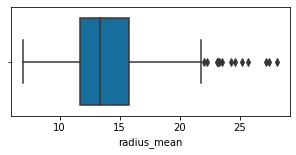

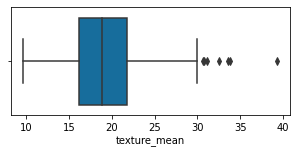

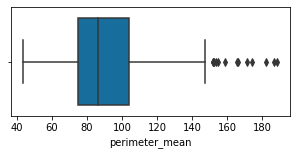

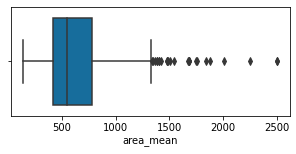

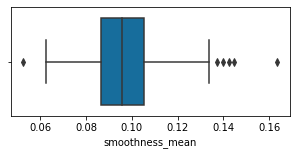

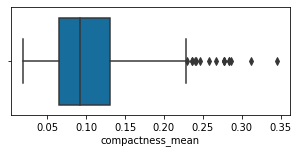

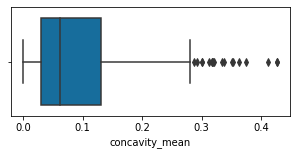

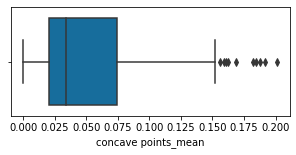

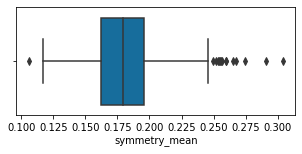

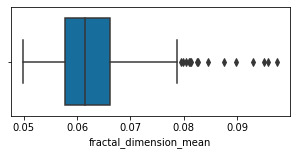

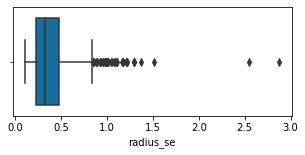

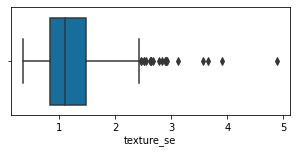

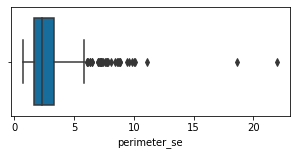

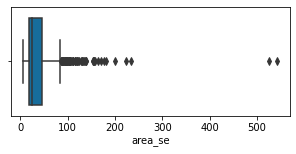

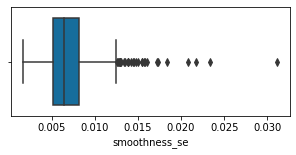

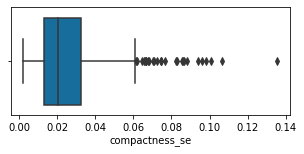

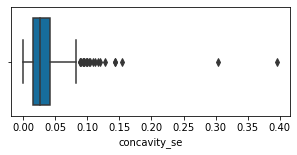

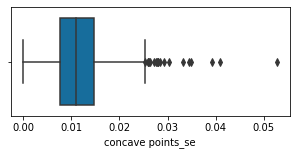

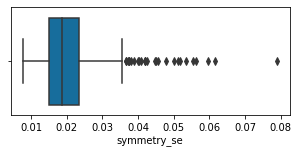

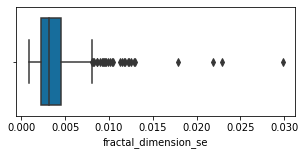

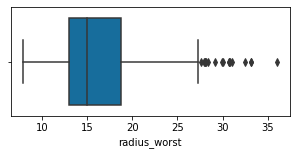

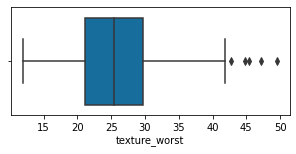

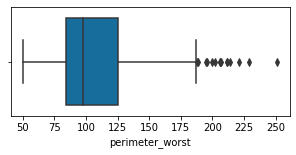

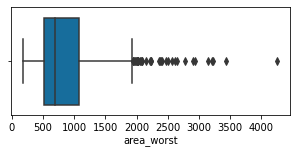

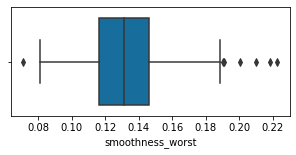

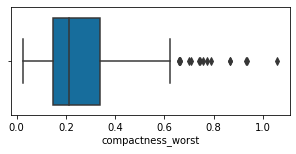

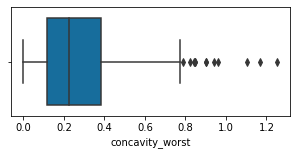

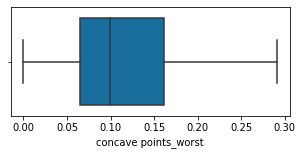

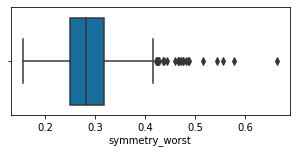

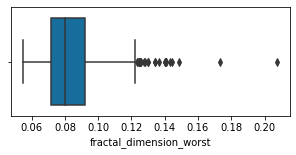

In [ ]:
# box plot to check outlier in each category
def boxPlot(dff):
    d = dff.drop(columns=['diagnosis'])
    for column in d:
        plt.figure(figsize=(5, 2))
        sns.boxplot(x=column, data=d, palette="colorblind")

boxPlot(df)

In [ ]:
# Quartile range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
inter_quartile_range = Q3 - Q1


In [ ]:
# quartiles and interquartile range

df_out = df[~((df < (Q1 - (1.5 * inter_quartile_range))) | (df > (Q3 + (1.5 * inter_quartile_range)))).any(axis=1)]
df.shape, df_out.shape

((569, 31), (398, 31))

In [ ]:
# Separate labels and features
X = df_out.drop(columns=['diagnosis'])
y = df_out['diagnosis']


In [ ]:
# Convert the M to 1 and B to 0 to the values categorical.
label = LabelEncoder()
y = label.fit_transform(y)
y[:20]

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
# Spilt the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# we used 30% test data
# check the size before beginning
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((278, 30), (120, 30), (278,), (120,))

In [ ]:
# cross validation function
def tn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 0]


def fp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 1]


def fn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 0]


def tp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 1]


def acc(y_true, y_pred):
    return accuracy(y_true, y_pred)


In [ ]:
# custom accuracy
def accuracy(y_true, y_pred):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    N = sum(map(sum, cnf_matrix))
    tp = cnf_matrix[1, 1]
    tn = cnf_matrix[0, 0]
    return round((tp + tn) / N, 2)


In [ ]:
# cross validation purpose
scoring = {'accuracy': make_scorer(metrics.accuracy_score), 'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'acc': make_scorer(acc)}

In [ ]:
def print_result(result):
    print("True Positive: ", result['test_tp'])
    print("True Negative: ", result['test_tn'])
    print("False Negative: ", result['test_fn'])
    print("False Positive: ", result['test_fp'])
    print("Accuracy: ", result['test_acc'])


In [ ]:
# acc list and rcc list stores the output of each model
acc = []
roc = []

In [ ]:
# Naive Bayes is our first model that we used for prediction:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("Naive Bayes : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

Naive Bayes : 
Training Set Accuracy :  0.9496402877697842
Test Set Accuracy 0.95 ROC 0.9452700253715114


In [ ]:
# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [5 7 6 7 6 6 7 7 6 4]
True Negative:  [20 21 21 20 20 20 20 20 19 21]
False Negative:  [1 0 1 0 1 1 0 0 0 2]
False Positive:  [2 0 0 1 1 1 1 1 2 0]
Accuracy:  [0.89 1.   0.96 0.96 0.93 0.93 0.96 0.96 0.93 0.93]


In [ ]:
# Logistic Regression : This is the second model we used for prediction:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
# find accuracy
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
# Code for ROC_AUC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Logistic Regression : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

****************************************************
Logistic Regression : 
Training Set Accuracy :  0.9496402877697842
Test Set Accuracy 0.975 ROC 0.9621239579557811


In [ ]:
# cross validation shows how accurate our model is
result = cross_validate(LR, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [4 7 5 5 6 6 5 6 4 5]
True Negative:  [22 20 21 21 20 19 20 21 20 20]
False Negative:  [2 0 2 2 1 1 2 1 2 1]
False Positive:  [0 1 0 0 1 2 1 0 1 1]
Accuracy:  [0.93 0.96 0.93 0.93 0.93 0.89 0.89 0.96 0.89 0.93]


In [ ]:
# Support Vector Machine: This is the third model we used for prediction:
model = SVC(gamma='auto', kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Support Vector Machine : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

****************************************************
Support Vector Machine : 
Training Set Accuracy :  0.9640287769784173
Test Set Accuracy 0.975 ROC 0.9621239579557811


In [ ]:
# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [4 7 5 7 7 6 5 7 5 5]
True Negative:  [22 20 21 20 21 20 21 21 20 20]
False Negative:  [2 0 2 0 0 1 2 0 1 1]
False Positive:  [0 1 0 1 0 1 0 0 1 1]
Accuracy:  [0.93 0.96 0.93 0.96 1.   0.93 0.93 1.   0.93 0.93]


In [ ]:
# KNN: This is the fourth model we used for prediction:
model = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("K-Nearest Neighbors : ")
print("Training Set Accuracy : ", ac_train)
print("Accuracy {0} ROC {1}".format(ac, rc))

****************************************************
K-Nearest Neighbors : 
Training Set Accuracy :  0.9280575539568345
Accuracy 0.95 ROC 0.9242479159115622


In [ ]:
# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [4 7 5 4 6 6 6 6 3 5]
True Negative:  [21 20 20 20 20 21 21 20 21 20]
False Negative:  [2 0 2 3 1 1 1 1 3 1]
False Positive:  [1 1 1 1 1 0 0 1 0 1]
Accuracy:  [0.89 0.96 0.89 0.86 0.93 0.96 0.96 0.93 0.89 0.93]


In [ ]:
# Random Forest: The fifth model we used for prediction:
model = RandomForestClassifier(n_estimators=20, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Random Forest : ")
print("Training Set Accuracy : ", ac_train)
print("Accuracy {0} ROC {1}".format(ac, rc))


****************************************************
Random Forest : 
Training Set Accuracy :  0.9928057553956835
Accuracy 0.95 ROC 0.9137368611815876


In [ ]:
# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [4 6 5 6 6 6 7 7 5 4]
True Negative:  [21 21 21 20 20 21 20 20 20 21]
False Negative:  [2 1 2 1 1 1 0 0 1 2]
False Positive:  [1 0 0 1 1 0 1 1 1 0]
Accuracy:  [0.89 0.96 0.93 0.93 0.93 0.96 0.96 0.96 0.93 0.93]


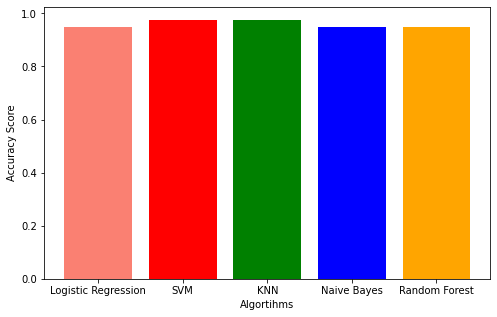

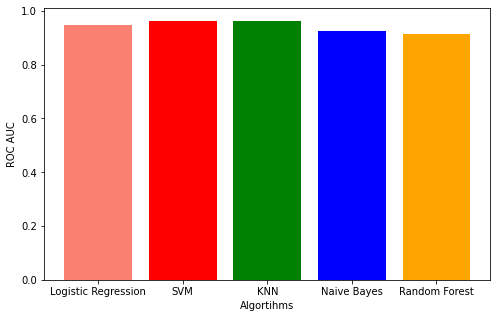

In [ ]:

# Plot the bar graph for accuracy and  roc-auc

# accuracy score
plt.figure(figsize=(8, 5))
plt.bar(['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes', 'Random Forest'], acc,
        color=['salmon', 'r', 'g', 'b', 'orange'], label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')

# roc-auc
plt.figure(figsize=(8, 5))
plt.bar(['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes', 'Random Forest'], roc,
        color=['salmon', 'r', 'g', 'b', 'orange'], label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()


In [ ]:
# From our analysis we found out that SVM is the best ML prediction model for our 
# dataset with an accuracy of 97.5%